Матрица смежности:
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
Матрица инциденций:
  (0, 0)	-1.0
  (1, 0)	1.0
  (0, 1)	-1.0
  (2, 1)	1.0
  (1, 2)	-1.0
  (2, 2)	1.0
  (2, 3)	-1.0
  (3, 3)	1.0


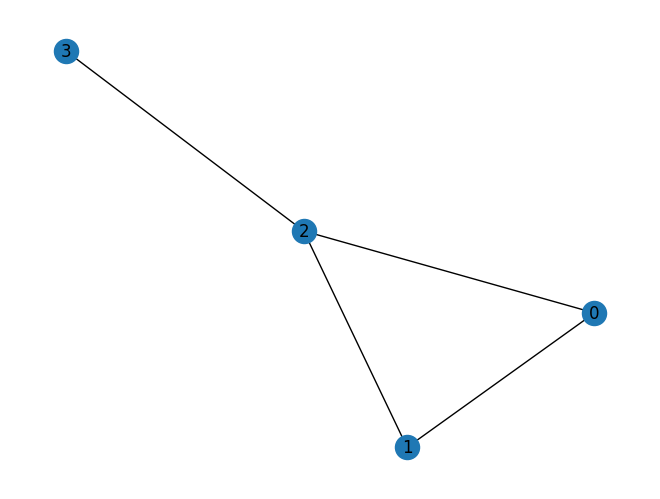

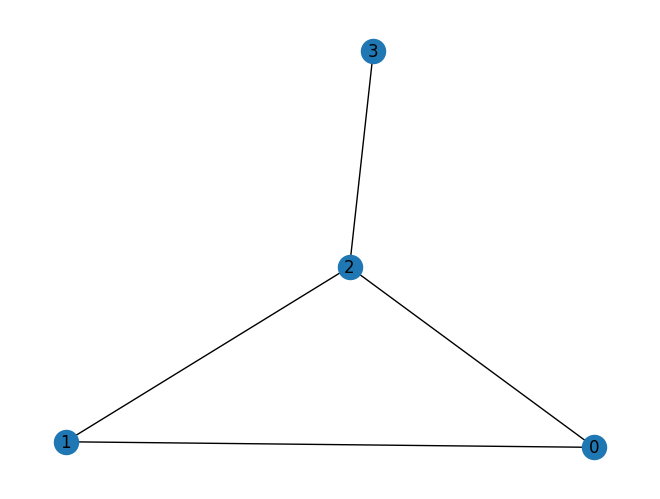

Тип графа: Неориентированный граф
Класс графа: Связный
Число маршрутов длины 3 равно 1
Все маршруты длины 3:
[0, 1, 2, 3]
Метрика графа:
Радиус: 1
Диаметр: 2
Периферийные вершины: [0, 1, 3]
Центральные вершины: [2]


In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


G = nx.Graph()
vertices = [0, 1, 2, 3]
edges = [
    (vertices[0], vertices[1]),
    (vertices[0], vertices[2]),
    (vertices[1], vertices[2]),
    (vertices[2], vertices[3])
]
G.add_edges_from(edges)
adjacency_matrix = nx.to_numpy_array(G)
incidence_matrix = nx.incidence_matrix(G, oriented=True)
print('Матрица смежности:')
print(adjacency_matrix)
print('Матрица инциденций:')
print(incidence_matrix)

graph_from_adjacency_matrix = nx.Graph(adjacency_matrix)
nx.draw(graph_from_adjacency_matrix, with_labels=True)
plt.show()
incidence_matrix_converted = np.array(incidence_matrix.toarray())
incidence_matrix_converted = (np.dot(incidence_matrix_converted, incidence_matrix_converted.T) != 0).astype(int)
np.fill_diagonal(incidence_matrix_converted, 0)
graph_from_incidence_matrix = nx.Graph(incidence_matrix_converted)
nx.draw(graph_from_incidence_matrix, with_labels=True)
plt.show()
graph_type = "Ориентированный граф" if G.is_directed() else "Неориентированный граф"
graph_class = None
if G.is_multigraph():
  graph_class = "Мультиграф"
elif nx.is_graphical(G):
  graph_class = "Графический"
elif nx.is_tree(G):
  graph_class = "Дерево"
elif nx.is_bipartite(G):
  graph_class = "Двудольный"
elif nx.is_forest(G):
  graph_class = "Лес"
elif nx.is_directed_acyclic_graph(G):
  graph_class = "DAG"
elif nx.is_connected(G):
  graph_class = 'Связный'
print("Тип графа:", graph_type)
print("Класс графа:", graph_class)

L = 3
paths = [path for path in nx.all_simple_paths(G, source=0, target=3) if len(path) == L + 1]
number_of_paths_of_length_3 = len(paths)
print('Число маршрутов длины 3 равно', number_of_paths_of_length_3)

print('Все маршруты длины 3:')
for path in paths:
  print(path)

radius = nx.radius(G)
diameter = nx.diameter(G)
peripheral_vertices = nx.periphery(G)
central_vertices = nx.center(G)
print('Метрика графа:')
print('Радиус:', radius)
print('Диаметр:', diameter)
print('Периферийные вершины:', peripheral_vertices)
print('Центральные вершины:', central_vertices)

In [4]:
def dfs(G, v, visited_vertices):
  visited_vertices.add(v)
  for u in G.neighbors(v):
    if u not in visited_vertices:
      dfs(G, u, visited_vertices)

def count_connected_components(G):
  number_of_connected_components = 0
  visited_vertices = set()
  for u in G.nodes():
    if u not in visited_vertices:
      number_of_connected_components += 1
      dfs(G, u, visited_vertices)
  return number_of_connected_components

number_of_connected_components = count_connected_components(G)
print('Число компонент связности для графа равно', number_of_connected_components)

Число компонент связности для графа равно 1


In [5]:
import itertools


def select_maximal_complete_subgraphs(G):
  maximal_complete_subgraphs = []
  cliques = nx.find_cliques(G)
  for clique in cliques:
    maximal_complete_subgraphs.append(clique)
  return maximal_complete_subgraphs

def select_maximal_empty_subgraphs(G):
  maximal_empty_subgraphs = []
  G1 = nx.complement(G)
  cliques = nx.find_cliques(G1)
  for clique in cliques:
    maximal_empty_subgraphs.append(clique)
  return maximal_empty_subgraphs

def check_solution(G, maximal_complete_subgraphs, maximal_empty_subgraphs):
  for subgraph in maximal_complete_subgraphs:
    for u in subgraph:
      for v in subgraph:
        if u != v and not G.has_edge(u, v):
          return False
  for other_subgraph in maximal_complete_subgraphs:
    if other_subgraph != subgraph and set(subgraph).issubset(set(other_subgraph)):
      return False
  for subgraph in maximal_empty_subgraphs:
    for u in subgraph:
      for v in subgraph:
        if u != v and G.has_edge(u, v):
          return False
  for other_subgraph in maximal_empty_subgraphs:
    if other_subgraph != subgraph and set(subgraph).issubset(set(other_subgraph)):
      return False
  return True

maximal_complete_subgraphs = select_maximal_complete_subgraphs(G)
maximal_empty_subgraphs = select_maximal_empty_subgraphs(G)
print('Максимальные полные подграфы графа:', maximal_complete_subgraphs)
print('Максимальные пустые подграфы графа:', maximal_empty_subgraphs)
print('Аналитический способ проверки правильности полученного решения:', check_solution(G, maximal_complete_subgraphs, maximal_empty_subgraphs))

Максимальные полные подграфы графа: [[2, 0, 1], [2, 3]]
Максимальные пустые подграфы графа: [[2], [3, 0], [3, 1]]
Аналитический способ проверки правильности полученного решения: True


Раскраска вершин графа:
Вершина 2 присвоена цвет 0
Вершина 0 присвоена цвет 1
Вершина 1 присвоена цвет 2
Вершина 3 присвоена цвет 1
Хроматическое число графа равно 3
Раскраска рёбер графа:
Ребро 3 присвоено цвет 0
Ребро 2 присвоено цвет 1
Ребро 0 присвоено цвет 0
Ребро 1 присвоено цвет 2


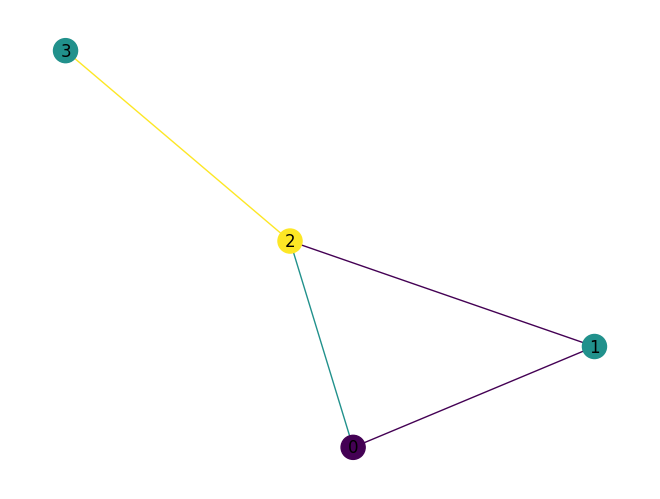

In [6]:
vertices_colors = nx.greedy_color(G)
chromatic_number = max(vertices_colors.values()) + 1
edges_colors = nx.greedy_color(G, strategy='random_sequential')
print('Раскраска вершин графа:')
for vertex, color in vertices_colors.items():
  print('Вершина', vertex, 'присвоена цвет', color)
print('Хроматическое число графа равно', chromatic_number)
print('Раскраска рёбер графа:')
for edge, color in edges_colors.items():
  print('Ребро', edge, 'присвоено цвет', color)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=list(vertices_colors.values()), edge_color=list(edges_colors.values()))
plt.show()

Матрица расстояний R:
[[ 0.  3.  4. inf]
 [inf  0.  9. inf]
 [inf inf  0.  8.]
 [inf inf inf  0.]]


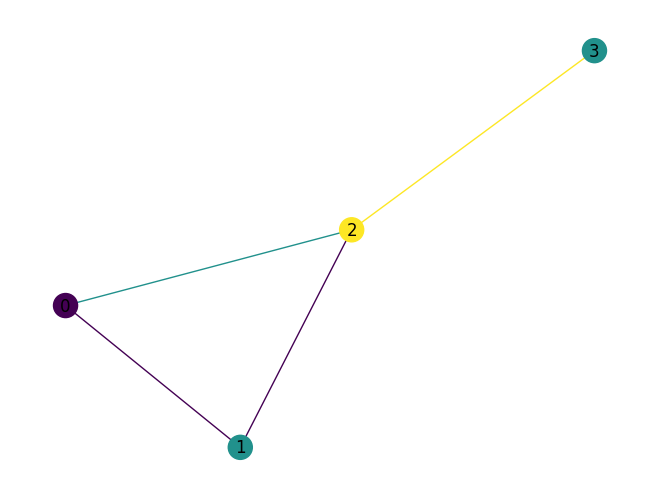

Таблица кратчайших расстояний:
| Вершина | Расстояние |
|   0  |   0   |
|   1  |   3.0   |
|   2  |   4.0   |
|   3  |   12.0   |


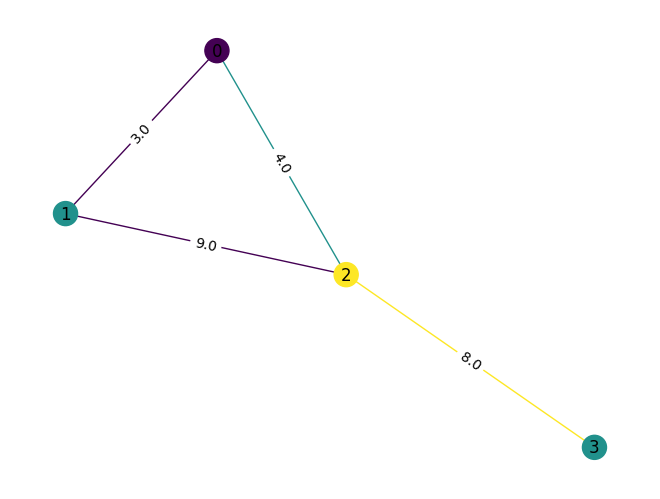

Обратный ход:
[0, 1, 2, 3]


In [20]:
def dijkstra(G, R, x0):
  vertices = G.nodes
  number_of_vertices = len(vertices)
  distances = {vertex: float('inf') for vertex in vertices}
  distances[x0] = 0
  visited = set()
  while len(visited) < len(vertices):
    minimum_distance = float('inf')
    minimum_vertex = None
    for vertex in vertices:
      if distances[vertex] < minimum_distance and vertex not in visited:
        minimum_distance = distances[vertex]
        minimum_vertex = vertex
    visited.add(minimum_vertex)
    for u in G.neighbors(minimum_vertex):
      weight = R[minimum_vertex][u]
      new_distance = distances[minimum_vertex] + weight
      if new_distance < distances[u]:
        distances[u] = new_distance
  return distances

def backword_dijkstra(x0, xk, predecessors):
  path = []
  current_node = xk
  while current_node != x0:
    path.insert(0, current_node)
    current_node = predecessors[current_node]
  path.insert(0, x0)
  return path

R = [
    [0., 3., 4., float('inf')],
    [float('inf'), 0., 9., float('inf')],
    [float('inf'), float('inf'), 0., 8.],
    [float('inf'), float('inf'), float('inf'), 0.]
]
predecessors = {0: None, 1: 0, 2: 1, 3: 2}
R = np.array(R)
print('Матрица расстояний R:')
print(R)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=list(vertices_colors.values()), edge_color=list(edges_colors.values()))
plt.show()
x0 = vertices[0]
shortest_paths = dijkstra(G, R, x0)
print('Таблица кратчайших расстояний:')
print("===============================")
print("| Вершина | Расстояние |")
print("===============================")
for vertex in vertices:
    print(f"|   {vertex}  |   {shortest_paths[vertex]}   |")
print("===============================")
weights = {edge: R[i][j] for edge, (i, j) in zip(G.edges, np.argwhere((R != float('inf')) & (R != 0)))}
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=list(vertices_colors.values()), edge_color=list(edges_colors.values()))
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.show()

xk = vertices[3]
shortest_path = backword_dijkstra(x0, xk, predecessors)
print("Обратный ход:")
print(shortest_path)